In [ ]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 3.1 MB/s eta 0:00:00


In [ ]:
#data / numbers
import pandas as pd
pd.options.plotting.backend = "plotly"
import numpy as np
import string
import itertools

#NLP
import spacy

#Tensorflow / Sentence Encoding
import tensorflow as tf
import tensorflow_hub as hub

#sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS 

#viz
import plotly
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, iplot, plot
import chart_studio
import plotly.figure_factory as ff
import chart_studio.plotly as py

import pandas as pd
import numpy as np
import spacy

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stop_words

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/my_dataframe.csv') #read in csv

In [ ]:
df.head()

,lyrics,genre
0,"summer after high school, when we first met we...",pop
1,"yeah, yeah, yeah i can feel a phoenix inside o...",pop
2,told them your dreams and they all started lau...,pop
3,"if i lost it all today, would you stay? could ...",pop
4,"nice legs, daisy dukes makes a man go that is ...",pop


In [ ]:
df.shape

(64543, 2)

In [ ]:
#plot genres
fig_genre = pd.DataFrame(df.genre.value_counts()).plot.barh(template='ggplot2')

#title parameters
title_param = dict(text='<b>Count of Genre</b><br></b>', 
                        font=dict(size=15))
#margin parameters
margin_param=dict(l=25,r=25,b=50,t=50,pad=0)

#update layout
fig_genre.update_layout(title=title_param,
                        margin = margin_param,
                        width=480,
                        height=500,        
                        xaxis = dict(title_text='Count',title_font = dict(size=10),tickfont=dict(size=10)),
                        yaxis = dict(title_text='Genre',title_font = dict(size=10),tickfont=dict(size=10)))

#change colours
fig_genre.update_traces(marker_color='rgb(148, 103, 189)')

#show plot
fig_genre.show()

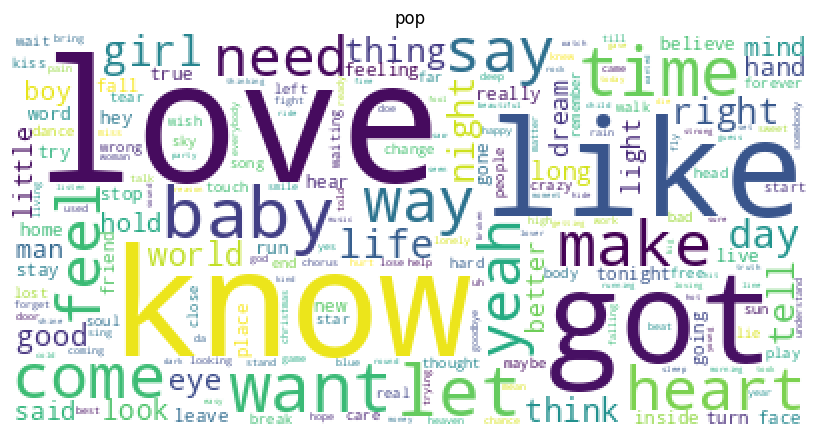

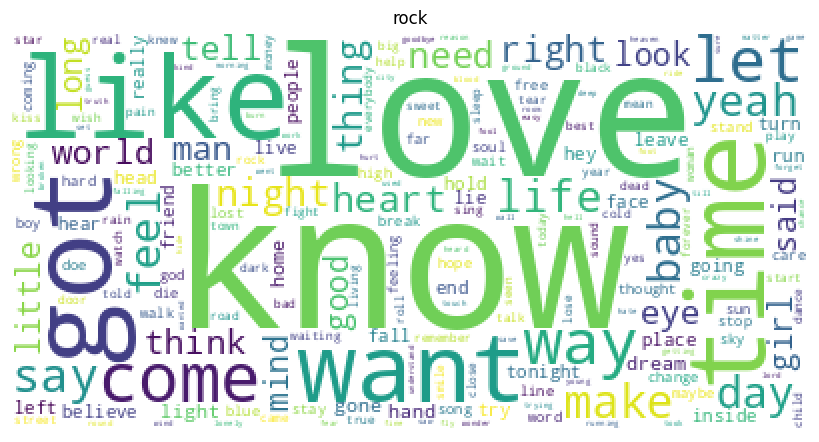

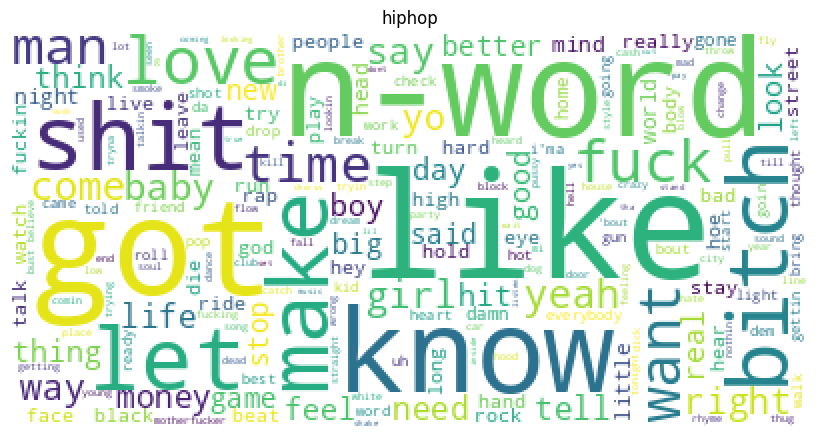

In [ ]:
# Create a dictionary to store the word frequency for each genre
genres = ['pop', 'rock', 'hiphop']
word_freq_dict = {genre: {} for genre in genres}

# Loop through each genre and count the frequency of each word in the lyrics
for genre in genres:
    lyrics = df[df['genre'] == genre]['lyrics'].str.cat(sep=' ')
    words = lyrics.split()
    for word in words:
        if word.lower() not in stop_words:  # remove stop words
            if word not in word_freq_dict[genre]:
                word_freq_dict[genre][word] = 1
            else:
                word_freq_dict[genre][word] += 1

# Generate word clouds for each genre
for genre in genres:
    wc = WordCloud(background_color='white').generate_from_frequencies(word_freq_dict[genre])
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wc)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title(genre)
    plt.show()

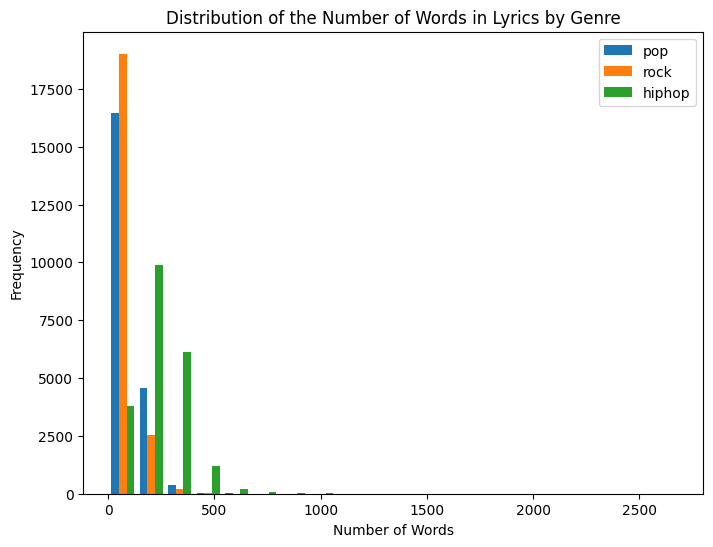

In [ ]:
import matplotlib.pyplot as plt

# Create a list to store the number of words in the lyrics for each genre
genres = ['pop', 'rock', 'hiphop']
word_count = [[] for i in range(len(genres))]

# Loop through each genre and count the number of words in the lyrics
for i, genre in enumerate(genres):
    lyrics = df[df['genre'] == genre]['lyrics'].str.split()
    for lyric in lyrics:
        word_count[i].append(len(lyric))

# Create a histogram showing the distribution of the number of words in the lyrics for each genre
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(word_count, bins=20, label=genres)
ax.set_xlabel('Number of Words')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of the Number of Words in Lyrics by Genre')
ax.legend()
plt.show()

In [ ]:
# Add a new column called 'length' to the dataframe
df['length'] = df['lyrics'].apply(lambda x: len(x.split()))

# Display the first 5 rows of the dataframe to verify that the 'length' column has been added
print(df.head())

                                              lyrics genre  length
0  summer after high school, when we first met we...   pop     221
1  yeah, yeah, yeah i can feel a phoenix inside o...   pop     190
2  told them your dreams and they all started lau...   pop     157
3  if i lost it all today, would you stay? could ...   pop     233
4  nice legs, daisy dukes makes a man go that is ...   pop     171


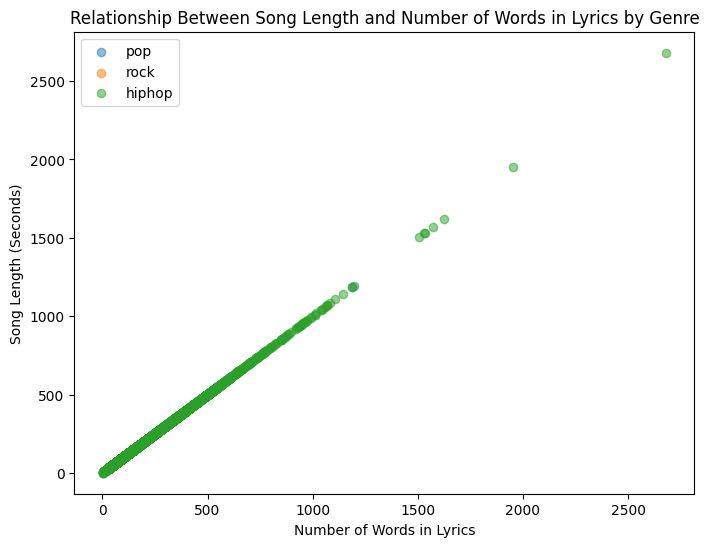

In [ ]:
import matplotlib.pyplot as plt

# Create a list to store the length of each song for each genre
genres = ['pop', 'rock', 'hiphop']
song_length = [[] for i in range(len(genres))]

# Create a list to store the number of words in the lyrics for each song for each genre
word_count = [[] for i in range(len(genres))]

# Loop through each genre and get the length of each song and the number of words in the lyrics
for i, genre in enumerate(genres):
    songs = df[df['genre'] == genre]
    for index, row in songs.iterrows():
        song_length[i].append(row['length'])
        word_count[i].append(len(row['lyrics'].split()))

# Create a scatter plot showing the relationship between the length of the song and the number of words in the lyrics for each genre
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(word_count[0], song_length[0], label=genres[0], alpha=0.5)
ax.scatter(word_count[1], song_length[1], label=genres[1], alpha=0.5)
ax.scatter(word_count[2], song_length[2], label=genres[2], alpha=0.5)
ax.set_xlabel('Number of Words in Lyrics')
ax.set_ylabel('Song Length (Seconds)')
ax.set_title('Relationship Between Song Length and Number of Words in Lyrics by Genre')
ax.legend()
plt.show()

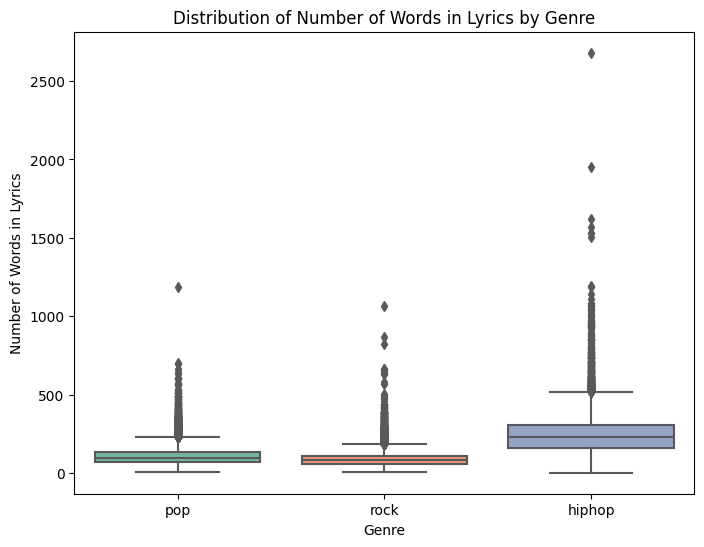

In [ ]:
import seaborn as sns

# Create a list to store the number of words in the lyrics for each song for each genre
word_count = [[] for i in range(len(genres))]

# Loop through each genre and get the number of words in the lyrics for each song
for i, genre in enumerate(genres):
    songs = df[df['genre'] == genre]
    for index, row in songs.iterrows():
        word_count[i].append(len(row['lyrics'].split()))

# Create a box plot showing the distribution of the number of words in the lyrics for each genre
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=word_count, orient='v', ax=ax, palette='Set2')
ax.set_xticklabels(genres)
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Words in Lyrics')
ax.set_title('Distribution of Number of Words in Lyrics by Genre')
plt.show()


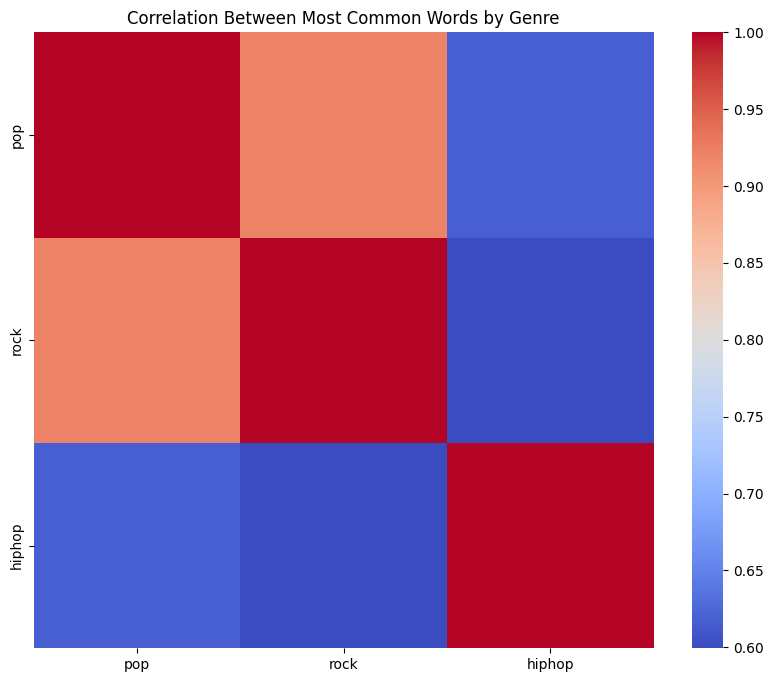

In [ ]:
import pandas as pd
import seaborn as sns

# Get the most common words for each genre
word_counts = {}
for genre in genres:
    genre_songs = df[df['genre'] == genre]
    lyrics = genre_songs['lyrics'].str.lower().str.cat(sep=' ')
    word_counts[genre] = pd.Series(lyrics.split()).value_counts().head(100)

# Combine the word counts into a single DataFrame
word_count_df = pd.concat(word_counts, axis=1)

# Fill in any missing values with 0
word_count_df.fillna(0, inplace=True)

# Calculate the correlation matrix between the most common words for each genre
corr_matrix = word_count_df.corr()

# Create a heatmap showing the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Between Most Common Words by Genre')
plt.show()


In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


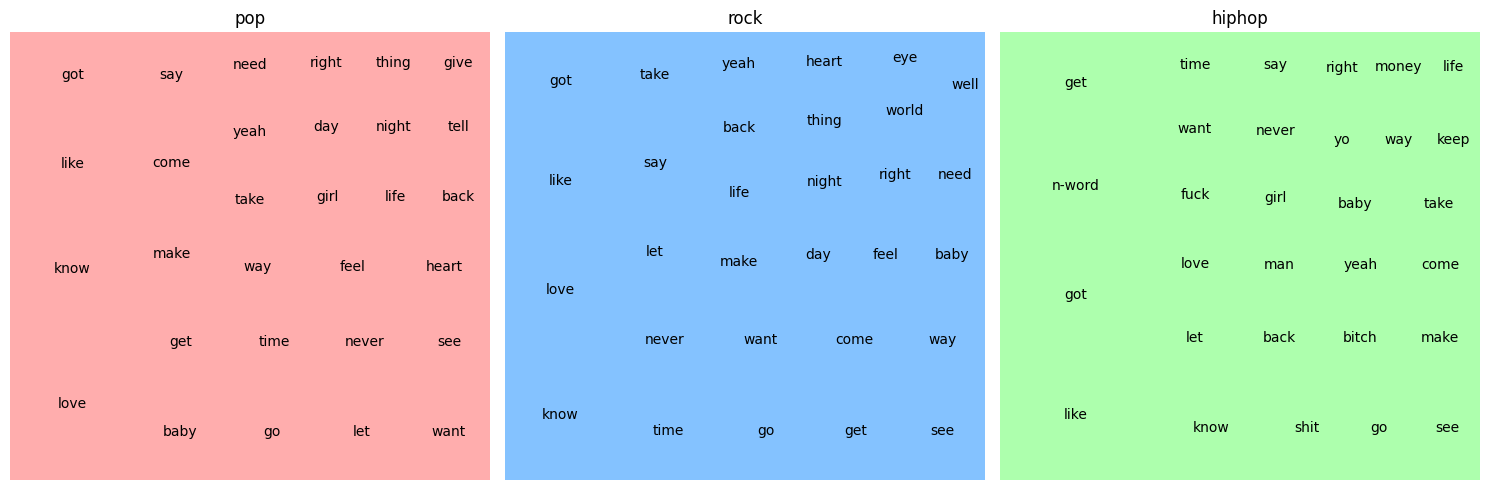

In [ ]:
import matplotlib.pyplot as plt
import squarify
from collections import Counter

# Define the genres and colors for the tree map
genres = ['pop', 'rock', 'hiphop']
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Create a subplot for each genre
fig, axs = plt.subplots(1, len(genres), figsize=(15, 5))

# Loop through each genre and create a tree map of the most frequent words
for i, genre in enumerate(genres):
    # Get the lyrics for the genre
    lyrics = df[df['genre'] == genre]['lyrics'].str.cat(sep=' ')
    
    # Count the frequency of each word in the lyrics
    word_counts = Counter(lyrics.split())
    
    # Get the 10 most frequent words and their counts
    top_words = word_counts.most_common(30)
    
    # Normalize the counts to get a percentage of the total words
    total_words = sum(word_counts.values())
    top_word_percents = [(word, count/total_words) for word, count in top_words]
    
    # Create a tree map of the top words
    squarify.plot(sizes=[percent for _, percent in top_word_percents], 
                  label=[word for word, _ in top_word_percents], 
                  alpha=0.8, color=colors[i], ax=axs[i])
    axs[i].set_title(genre)
    axs[i].axis('off')

# Show the plot
plt.tight_layout()
plt.show()
